1)

In [1]:
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade pandas
#!pip install --upgrade numpy
#!pip install --upgrade scipy

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
    100% |████████████████████████████████| 5.4MB 4.2MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2
    100% |████████████████████████████████| 8.9MB 3.1MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
    100% |████████████████████████████████| 13.9MB 2.6MB/s 
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/giorgosHadji/NN_data/master/spambase.data?fbclid=IwAR2uGPtqxKeIZS9cKtAkduIdDiHbiomYtaX5wTjCKBjk8xp0okzX4BcZ9BI", header=None) 
print(df.head())
print(df.shape)
print(df.dtypes)
#print(df)

     0     1     2    3     4     5     6     7     8     9  ...    48     49  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.000   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94 ...  0.00  0.132   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25 ...  0.01  0.143   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.137   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.135   

    50     51     52     53     54   55    56  57  
0  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]
(4601, 58)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64

2) δείγματα: 4601 (αναφέρονται σε emails), χαρακτηριστικά: 57. Τελευταία στήλη είναι οι ετικέτες.

\
3) Εκτυπώνοντας μέρος των δεδομένων παρατηρούμε ότι δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών.

\
4) Τελευταία στήλη είναι οι ετικέτες οι οποίες σύμφωνα με την περιγραφή του data set είναι 0 ή 1 (δεν είναι ή είναι spam το email). 

\
5) Το είδος των χαρακτηριστικών είναι μόνο float64 και int64 επομένως δεν χρειάζονται ιδιαίτερες μετατροπές, αφού δεν υπάρχουν ονοματικά ή διατεταγμένα χαρακτηριστικά .

6) Όσο για τον έλεγχο απουσιάζουσων τιμών, η περιγραφή του data set δεν μας ενημερώνει για κάποια ειδική τιμή που αντιστοιχεί σε έλλειψη (αυτό μπορούμε να το καταλάβουμε και μόνοι μας από το ότι όλοι οι τύποι των χαρακτηριστικών είναι int, float). Επομένως ελέγχουμε μόνο για Nan:

In [3]:
print(df.shape)
print(df.dropna(axis=0).shape) #Έλεγχος για άλλες απουσιάζουσες (Nan)

(4601, 58)
(4601, 58)


Επομένως δεν υπάρχουν απουσιάζουσες τιμές!

7) Στη συνέχεια υπολογίζουμε το ποσοστό των δειγμάτων ανά κλάση και συμπεραίνουμε αν το data set είναι ισορροπημένο.

In [4]:
#μετατροπή από pandas σε numpy.array
np_data = df.values
print("rows:",len(np_data))
print("columns:",len(np_data[0]))

#διαχωρισμός data, labels
data = np_data[:,0:-1]
data_labels = np_data[:,-1].astype(int)
print(data.shape)
print(data_labels.shape)

#εύρεση συχνότητας δειγμάτων σε κάθε κλάση
frequencies = np.bincount(data_labels) 
print("frequencies: ", frequencies)
print("\n")

#ποσοστό δειγμάτων κάθε κλάσης επί του συνόλου
print("Ποσοστό των δειγμάτων του συνόλου ανά κλάση: ")
spam_names = {0: 'non-spam', 1: 'spam'}
allF = frequencies.sum()
for k,v in spam_names.items():
  print(k, " - ", v, ": ", frequencies[k]/allF*100, "%")

rows: 4601
columns: 58
(4601, 57)
(4601,)
frequencies:  [2788 1813]


Ποσοστό των δειγμάτων του συνόλου ανά κλάση: 
0  -  non-spam :  60.59552271245382 %
1  -  spam :  39.404477287546186 %


Επομένως το data set θεωρείται ισορροπημένο αφού δεν είναι η μία κλάση πάνω από 1.5 φορά συχνότερη από την άλλη. 

8) Εφόσον δεν υπάρχουν απουσιάζουσες τιμές ούτε ονοματικά-διατεταγμένα χαρακτηριστικά, απλά διαχωρίζουμε σε train - test sets:

In [0]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.30) 

#Γ. Baseline classification

In [0]:
#Dummy Classifiers

from sklearn.dummy import DummyClassifier

#Δημιουργία - ορισμός των dummy classifiers
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#Ορισμός dictionary για τους classifiers
spam_predictors = {}

#Αποθηκεύουμε τους classifiers στο dictionary με τους άλλους για να τους τρέξουμε όλους μαζί στο τέλος
spam_predictors['uniform (random)'] = dc_uniform
spam_predictors['constant 0'] = dc_constant_0
spam_predictors['constant 1'] = dc_constant_1
spam_predictors['most frequent label'] = dc_most_frequent
spam_predictors['stratified'] = dc_stratified

In [0]:
#Gaussian Classifier

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
#Αποθηκεύουμε τον classifier στο dictionary με τους άλλους για να τους τρέξουμε όλους μαζί
spam_predictors['gaussian naive bayes'] = gnb

In [0]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
#Αποθηκεύουμε τον classifier στο dictionary με τους άλλους για να τους τρέξουμε όλους μαζί
spam_predictors['knn'] = knn

In [0]:
#MLP Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
#Αποθηκεύουμε τον classifier στο dictionary με τους άλλους για να τους τρέξουμε όλους μαζί
spam_predictors['mlp'] = mlp

In [0]:
#Eκπαιδεύουμε όλα τα μοντέλα και βρίσκουμε τις προβλέψεις του κάθε classifier που ορίσαμε από πάνω

spam_pred = {}

for i,j in spam_predictors.items():
  j.fit(train, train_labels)
  spam_pred[i] = j.predict(test)

Μέχρι εδώ έχουμε τα predictions όλων των classifiers στο λεξικό spam_pred. Στη συνέχεια θα υπολογίσουμε τις μετρικές f1_micro average και f1_macro average. 

In [11]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

micro_avg_f1 = []
macro_avg_f1 = [] 

print("<classifier> - <average_type>: (<precision>, <recall>, <f1_score>, None)\n")
for classifier, pred in spam_pred.items():
    # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων (globaly)) τα δείγματα (average = micro).
    avg = precision_recall_fscore_support(test_labels, pred, average='micro')
    micro_avg_f1.append(avg[2])
    print(classifier, " - micro: ", avg)
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro) <- για καθε κλαση!! εδω γιατι εχω μονο 1 αριθμο;
    avg = precision_recall_fscore_support(test_labels, pred, average='macro')
    macro_avg_f1.append(avg[2])
    print(classifier, " - macro: ", avg, "\n")

<classifier> - <average_type>: (<precision>, <recall>, <f1_score>, None)

uniform (random)  - micro:  (0.47574221578566256, 0.47574221578566256, 0.4757422157856625, None)
uniform (random)  - macro:  (0.4794713739656403, 0.478613937205995, 0.4720814219699082, None) 

constant 0  - micro:  (0.6017378711078928, 0.6017378711078928, 0.6017378711078928, None)
constant 0  - macro:  (0.3008689355539464, 0.5, 0.37567811934900536, None) 

constant 1  - micro:  (0.39826212889210716, 0.39826212889210716, 0.39826212889210716, None)
constant 1  - macro:  (0.19913106444605358, 0.5, 0.28482651475919213, None) 

most frequent label  - micro:  (0.6017378711078928, 0.6017378711078928, 0.6017378711078928, None)
most frequent label  - macro:  (0.3008689355539464, 0.5, 0.37567811934900536, None) 

stratified  - micro:  (0.5293265749456916, 0.5293265749456916, 0.5293265749456916, None)
stratified  - macro:  (0.5026201621704504, 0.5025423914232579, 0.502088935630164, None) 

gaussian naive bayes  - micro:  (0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Συνεχίζουμε με υπολογισμό των confusion matrix και των γραφικών.

In [12]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

print("[ ", end='')
for i,j in spam_names.items():
  print("'", j, "'  ", end='')
print("] \n")
for classifier,pred in spam_pred.items():
  print(classifier)
  cnf_matrix = confusion_matrix(test_labels, pred)
  print(cnf_matrix)
  print("")

[ ' non-spam '  ' spam '  ] 

uniform (random)
[[386 445]
 [279 271]]

constant 0
[[831   0]
 [550   0]]

constant 1
[[  0 831]
 [  0 550]]

most frequent label
[[831   0]
 [550   0]]

stratified
[[527 304]
 [346 204]]

gaussian naive bayes
[[627 204]
 [ 22 528]]

knn
[[692 139]
 [171 379]]

mlp
[[765  66]
 [ 59 491]]



**3) Σχολιασμός confusion matrix:**

Αρχικά επισημαίνουμε ότι κάθε γραμμή ενός confusion matrix αντιστοιχίζεται σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε γραμμή είναι λάνθασμένα αρνητικά, δηλαδή δεν κατηγοριοποιήθηκαν στην κατηγορία της γραμμής ενώ ανήκαν. Άρα με παρατήρηση των γραμμών εξετάζω το recall. Αντίστοιχα, κάθε στήλη ενός confusion matrix αντιστοιχίζεται επίσης σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε στήλη είναι λάνθασμένα θετικά, δηλαδή κατηγοριοποιήθηκαν στην κατηγορία της στήλης ενώ δεν ανήκαν. Άρα με παρατήρηση των στηλών εξετάζω το precision.
\

\
**uniform (random):**

Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί τυχαία, με ομοιόμορφη πιθανότητα τα δείγματα του test set σε κλάσεις.

\
**constant_x:**

Σε κάθε πίνακα constant_x όλα τα δείγματα έχουν ταξινομηθεί στην κλάση x και γι' αυτό οι μόνες μη μηδενικες τιμές στον πίνακα είναι η στήλη x. Αυτό μας δίνει κακό precision και recall σε όλες τις κλάσεις εκτός της κλάσης x όπου το precision αναμένεται πολύ μικρό αλλά το recall αναμένεται μέγιστο, δηλαδή 1. Π.χ., στον πίνακα του contant_1 η γραμμή 1 έχει μηδενικά όλα τα στοιχεία εκτός διαγωνίου (βέλτιστο recall), ενώ η στήλη 1 έχει παντού μη μηδενικά στοιχεία (κακό precision).

\
**most frequent label:**

Ο ταξινομητής αυτός είναι ίδιος με τον  constant_x, όπου x είναι η πιο συχνά εμφανιζόμενη κλάση στο train set. Επομένως ίσχυουν τα ίδια σχόλια με πριν. Μπορούμε να πούμε ότι αυτός ο ταξινομητής είναι ό,τι καλύτερο μπορεί να πετύχει ένα constant ταξινομητής.

\
**stratified:**

Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί με βάση τη συχνότητα εμφάνισης των δειγμάτων στις κλάσεις στο train set, δηλαδή περίπου 60-40. 

\
**gaussian naive bayes:**

Οι τιμές εκτός διαγωνίου αυτού του πίνακα είναι μικρότερες που σημαίνει ότι έχουμε καλύτερο recall-precision συνολικά στις 2 κλάσεις από τους προηγούμενους ταξινομητές. Ο ταξινομητής φαίνεται να προσδίδει καλό recall στην κλάση spam, δηλαδή είναι λίγα τα δείγματα (στοιχείο του πίνακα: (1,0)) που ανήκουν στην κλάση αυτή αλλά ο ταξινομητής δεν τα βάζει εκεί, κάτι που είναι σημαντικό για τη συγκεκριμένη εφαρμογή.

\
**knn:**

Παρατηρείται χειρότερο recall στην κλάση spam σε σχέση με τον gaussian naive bayes αλλά καλύτερο recall για την κλάση non-spam.  Αντίστοιχα για το precision. Γενικά έχουμε προφανώς καλύτερο πίνακα σε σχέση με τους dummy classifiers.

\
**mlp:**

Συνολικά είναι καλύτερος σε όλα σε σχέση με όλους τους προηγούμενους. Όμως, στο σημείο που μας ενδιαφέρει ακρίβεια (recall spam κλάσης) ο mlp εμφανίζεται λίγο χειρότερος από τον gaussian naive bayes.

\
Παρακάτω εκτυπώνουμε τα recall, precission (average = macro) για κάθε ταξινομητή για να επιβεβαιώσουμε τον σχολιασμό μας:

In [13]:
for classifier, pred in spam_pred.items():  
    print(classifier)
    print(classification_report(test_labels, pred))

uniform (random)
              precision    recall  f1-score   support

           0       0.58      0.46      0.52       831
           1       0.38      0.49      0.43       550

   micro avg       0.48      0.48      0.48      1381
   macro avg       0.48      0.48      0.47      1381
weighted avg       0.50      0.48      0.48      1381

constant 0
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       831
           1       0.00      0.00      0.00       550

   micro avg       0.60      0.60      0.60      1381
   macro avg       0.30      0.50      0.38      1381
weighted avg       0.36      0.60      0.45      1381

constant 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       831
           1       0.40      1.00      0.57       550

   micro avg       0.40      0.40      0.40      1381
   macro avg       0.20      0.50      0.28      1381
weighted avg       0.16      0.40  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Με τους παραπάνω πίνακες επιβεβαιώνονται οι σχολιασμοί μας με βάση το confusion matrix.

\
Στη συνέχεια, εκτυπώνουμε με bar-plots f1-macro και f1-micro:

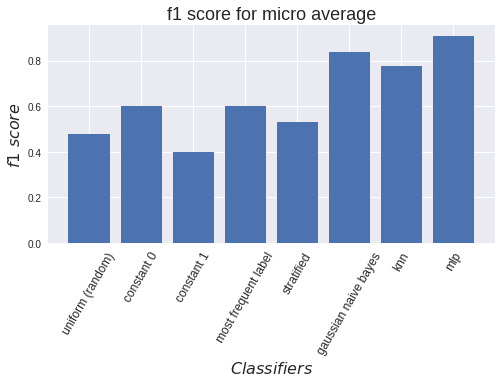

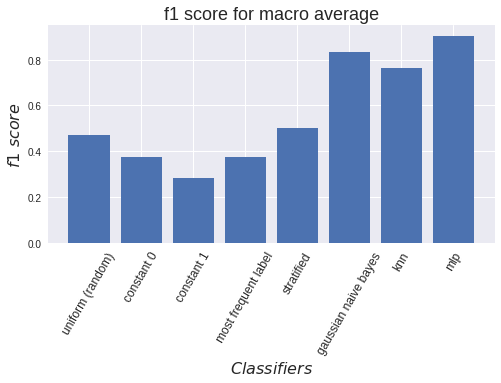

In [14]:
#Bar plots for f1-micro average

import matplotlib.pyplot as plt

classifiers = list(spam_pred.keys())

y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

plt.bar(y, micro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

plt.bar(y, macro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

Σχολιασμός γραφικών:

Παρατηρούμε ότι uniform, stratified έχουν πάνω κάτω ίδιες μετρικές μεταξύ τους αφού λόγω των ποσοστών των δειγμάτων στις κλάσεις είναι περίπου uniform (60-40). Επίσης, όπως είχαμε σχολιάσει και παραπάνω, οι knn, gaussian και mlp είναι καλύτεροι με τη σειρά που αναγράφεται. Ακόμα παρατηρείται μείωση των μετρικών από micro σε macro επίπεδο για τους constant, most frequent. Αυτό συμβαίνει επειδή στην macro περίπτωση κάθε κλάση συνεισφέρει το ίδιο στο f1 score, ανεξάρτητα με το πόσα δείγματα ανήκουν σε αυτήν. Αντίθετα, στη micro περίπτωση οι κλάσεις συνεισφέρουν ανάλογα με το ποσοστό των δειγμάτων που ανήκουν σε αυτές επί του συνόλου.

/////?????????????? giati sotys allou den allazei mivcro macro

Όπως αντιλαμβανόμαστε από τις παραπάνω μετρικές όλων των predictors υπάρχουν περιθώρια βελτίωσης (όχι για τους dummy)

#Δ. Βελτιστοποίηση ταξινομητών

Σε αυτό το μέρος θα βελτιστοποιήσουμε τους ταξινομητές nn, gaussian naive bayes και mlp που περιγράφηκαν παραπάνω. Αυτο θα το επιτύχουμε βρίσκοντας τα στάδια προεπεξεργασίας (με τη χρήση pipelines) και τις υπερπαραμέτρους (με τη χρήση grid-search) για τον καθένα ξεχωριστά ώστε να πετυχαίνουν όσο το δυνατόν υψηλότερη απόδοση.

Σημειώνεται ότι για να επιλέξουμε την καλύτερη κανονικοποίηση (min-max ή standard) θα τρέξουμε την παραπάνω διαδικασία 2 φορές, μία για κάθε κανονικοποίηση.

Ξεκινάμε με την **standard κανονικοποίηση**.

In [15]:
!pip install --upgrade imbalanced-learn

    100% |████████████████████████████████| 174kB 6.8MB/s 


Ξεκινάμε με τον **KNN Classifier**:

In [0]:
#KNN Classifier

from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

#Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]) #without ros
#pipe2 = Pipeline(steps=[('selector', selector), ('kNN', clf)])
#pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', clf)]) #without pca
#pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)]) #without selector, καλά λλά όχι οπτ αποτελέσματα αλλά δεν έχει νόημα να διατηρώ χαρακτ με var=0.
#pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', clf)])
#pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('kNN', clf)])
#pipe8 = Pipeline(steps=[('sampler', ros), ('kNN', clf)])
#pipe1 = Pipeline(steps=[('pca', pca), ('kNN', clf)])





pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
#pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
#pipes['pipe5'] = pipe5
#pipes['pipe6'] = pipe6
#pipes['pipe7'] = pipe7
#pipes['pipe8'] = pipe8
#pipes['pipe9'] = pipe9

In [69]:
#εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(train, train_labels)
  preds = pipe.predict(test)
  print(pipe_name, "\n", classification_report(test_labels, preds))

pipe1 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       831
           1       0.86      0.90      0.88       550

   micro avg       0.90      0.90      0.90      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.90      0.90      0.90      1381

pipe2 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       831
           1       0.91      0.86      0.88       550

   micro avg       0.91      0.91      0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

pipe4 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       831
           1       0.88      0.88      0.88       550

   micro avg       0.90      0.90      0.90      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.90      0.90      0.90      1

Πειραματιζόμενοι με τις επιλογές στο pipeline, παρατηρούμε ότι ο scaler είναι απαραίτητος για να επιτευχθεί καλή επίδοση και ότι ο selector επίσης βελτιώνει πάντα την κατάσταση αφού απλώς κόβει τα χαρακτηριστικά με μηδενικό variance, δηλαδή δεν έχει ποτέ αρνητική επίδραση.

Από τη σύγκριση pipe1, pipe2, ο 1ος υπερισχύει του 2ου στο recall της κατηγορίας '1' δηλαδή των spam δειγμάτων, κάτι που όπως προείπαμε μας ενδιαφέρει ιδιαίτερα.

Εν συνεχεία θα χρησιμποιήσουμε την GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας για το κάθε αξιόλογο pipe, καθώς πριν ήταν ορισμένες στις default. 

\
Αρχικά μελετάμε το variance των μεταβλητών για τη variance threshold:

In [70]:
train_var = train.var(axis=0)
print(train_var)
print("max variance: ", np.max(train_var))
print("min variance: ", np.min(train_var))

[8.85438185e-02 1.62381226e+00 2.41770910e-01 2.75352893e+00
 4.58484671e-01 6.43851290e-02 1.50270347e-01 1.69041859e-01
 8.15164193e-02 4.33318876e-01 4.11579949e-02 7.52302980e-01
 9.65247299e-02 8.82737389e-02 6.81178579e-02 6.70585298e-01
 2.00111042e-01 2.66450577e-01 3.22960771e+00 1.89209207e-01
 1.46460733e+00 9.57492929e-01 1.22600693e-01 1.74279552e-01
 3.03013540e+00 7.92400467e-01 1.11355898e+01 2.79431161e-01
 3.69372214e-01 1.96654727e-01 1.67430052e-01 9.25728002e-02
 2.23905923e-01 9.33930645e-02 3.03123366e-01 1.52380075e-01
 1.86442579e-01 5.16825348e-02 2.18294103e-01 1.05754376e-01
 1.44676994e-01 5.18818279e-01 5.25112440e-02 3.38289753e-01
 1.01731044e+00 8.11076056e-01 6.17940527e-03 1.04508567e-01
 7.07340462e-02 8.64460100e-02 9.35495401e-03 8.25557464e-01
 5.56202038e-02 2.38892189e-01 1.19122268e+03 4.82172425e+04
 3.56565809e+05]
max variance:  356565.8093355766
min variance:  0.00617940526985819


Παρατηρούμε ότι κάποια χαρακτηριστικά έχουν πολύ χαμηλό variance ενώ άλλα πολύ υψηλό. Σημειώνεται ότι τα χαρακτηριστικά δεν είναι κανονικοποιημένα οπότε κάτι τέτοιο είναι αναμενόμενο. Επομένως ορίζουμε στον παρακάτω κώδικα διάφορες τιμές για έλεχγο της υπερπαραμέτρου vthreshold. Επίσης, γνωρίζουμε ότι διατίθονται 57 χαρακτηριστικά στο data set οπότε ορίζουμε ανάλογα και κάποιες τιμές της υπερπαραμέτρου n_components της μεθόδου pca. Τέλος, δίνουμε και κάποιες τιμές στην υπερπαράμετρο k του ταξινομητή.

In [74]:
#Ορισμός διάφορων υπερπαραμέτρων για εισαγωγή στο grid-search

vthreshold = [0, 0.1, 1, 10]
#n_components = [10, 20, 30, 40, 50, 57]
#n_components=10 must be between 0 and min(n_samples, n_features)=8
n_components = 'mle' #meta mou evgale oti prepei na einai ligotero apo 4.. eleos
k = [1, 6, 11, 21, 31, 41]

NameError: ignored

In [0]:
pipes = {}

pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp') #without ros
#pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', clf)], memory = 'tmp') #without pca

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
#pipes['pipe4'] = pipe4

In [73]:
#ορισμός του estimator μέσω grid

import time
from sklearn.model_selection import GridSearchCV

for pipe_name, pipe in pipes.items():
  estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)
  start_time = time.time()
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)
  print(pipe_name)
  print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
  print(classification_report(test_labels, preds))
  print(estimator.best_estimator_)
  print(estimator.best_params_)
  print("")

ValueError: ignored

In [80]:
param_dict = {"pca__n_components":[10, 20, 57],
             "selector__threshold": [0, 0.01, 0.1, 1],
             "kNN__n_neighbors": [1,5,19,27,31,39]}

estimator = GridSearchCV(pipe1, param_dict, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("pipe4")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, preds))
print(estimator.best_estimator_)
print(estimator.best_params_)
print("")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: ignored

In [0]:
print(preds.dtype)

In [0]:
np.bincount(train_labels)